# Basic cleaning, transormation and feature engineering were made with data
# After some descriptive statistics were made to take a look on data
# The main disadvantage of what have been done is data was not considered as a time series that is way time series techniques was not applied
# As result plotting and analysing of distributions that do not have stationarity is wrong in terms of analysing time series

# rdy_to_stats.xlsx file creates here

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from scipy.stats import norm, kstest, shapiro, iqr

In [191]:
# this are periods when 1,2,3,4 HEs were under operation
time_periods = [
    ("2022-09-05","2022-09-09"), ("2022-09-12","2022-09-13"),
    ("2022-10-17","2022-10-21"), ("2022-11-08","2022-11-11"), ("2022-11-15","2022-11-18"),
    ("2022-11-22","2022-11-25"), ("2022-11-29","2022-12-02"), ("2022-12-05","2022-12-09"), 
    ("2022-12-12","2022-12-16"), ("2022-12-19","2022-12-23"), ("2023-01-10","2023-01-13"), 
    ("2023-01-16","2023-01-19"), ("2023-01-24","2023-01-27"), ("2023-01-31","2023-02-03"), 
    ("2023-02-07","2023-02-09"), ("2023-02-13","2023-02-17"), ("2023-02-28","2023-03-03"), 
    ("2023-03-06","2023-03-07"), ("2023-03-09","2023-03-10"), ("2023-03-14","2023-03-17"),
    ("2023-03-27","2023-03-31"), ("2023-04-03","2023-04-07"), ("2023-04-10","2023-04-14"),
    ("2023-04-17","2023-04-21"), ("2023-05-02","2023-05-05"), ("2023-05-08","2023-05-12"),
    ("2023-05-15","2023-05-19"), ("2023-05-22","2023-05-26"), ("2023-05-29","2023-06-02"),
    ("2023-06-05","2023-06-09") #, ("2023-09-05","2023-09-08")
]

time_periods2 = [
#     ("2021-09-06","2021-09-10"), ("2021-09-13","2021-09-17"), ("2021-09-20","2021-10-01"),
    ("2021-10-04","2021-10-08"), ("2021-10-11","2021-10-15"), ("2021-11-08","2021-11-12"),
    ("2021-11-15","2021-11-19"), ("2021-11-22","2021-11-26"), ("2021-11-29","2021-12-03"),
    ("2021-12-07","2021-12-03"), ("2021-12-13","2021-12-17"), ("2021-12-20","2021-12-24"),
    ("2022-01-18","2022-01-21"), ("2022-01-24","2022-01-26"), ("2022-02-01","2022-02-04"),
    ("2022-02-08","2022-02-11"), ("2022-02-14","2022-02-18"), ("2022-02-24","2022-02-25"),
    ("2022-03-01","2022-03-04"), ("2022-03-15","2022-03-18"), ("2022-03-21","2022-03-25"),
    ("2022-03-29","2022-04-01"), ("2022-04-12","2022-04-15"), ("2022-04-18","2022-04-22"),
    ("2022-05-02","2022-05-06"), ("2022-05-09","2022-05-13"), ("2022-05-16","2022-05-20"),
    ("2022-05-23","2022-05-27"), ("2022-06-07","2022-06-10"), ("2022-06-20","2022-06-24"),
    ("2022-06-28","2022-06-30")
    
]

time_periods3 = [
    ("2020-10-12","2020-10-16"), ("2020-10-21","2020-10-23"), ("2020-10-28","2020-10-30"),
    ("2020-11-11","2020-11-13"), ("2020-11-16","2020-11-20"), ("2020-11-24","2020-11-27"),
    ("2020-12-03","2020-12-04"), ("2020-12-07","2020-12-11"), ("2020-12-16","2020-12-18"), 
    ("2020-12-24","2020-12-25"), ("2020-12-29","2020-12-30"), ("2021-01-12","2021-01-15"),
    ("2021-01-18","2021-01-22"), ("2021-02-01","2021-02-05"), ("2021-02-08","2021-02-12"),
    ("2021-02-15","2021-02-19"), ("2021-03-01","2021-03-05"), ("2021-03-09","2021-03-12"),
    ("2021-03-15","2021-03-19"), ("2021-03-22","2021-03-26"), ("2021-04-01","2021-04-02"),
    ("2021-04-05","2021-04-09"), ("2021-04-05","2021-04-09"), ("2021-04-12","2021-04-16"),
    ("2021-04-20","2021-04-24"), ("2021-04-26","2021-04-30"), ("2021-05-03","2021-05-07"),
    ("2021-05-11","2021-05-15"), ("2021-05-17","2021-05-21"), ("2021-05-24","2021-05-28"),
    ("2021-06-15","2021-06-18"), ("2021-06-21","2021-06-25"), ("2021-06-28","2021-07-02")
]

In [192]:
time_periods_all = [*time_periods3, *time_periods2, *time_periods]

### All IDs used
* 299 Т1к после ТО
* 309 Р2контура
* 315 T1k before HE
* 317 Т2к перед ТО
* 319 Т2к после ТО
* 321 T reactor
* 325 Т2к выхТО1
* 327 Твозвуха
* 381 Iвг1
* 395 Iвг2
* 396 Iвг3
* 460 Т2к выхТО2
* 461 Т2к выхТО3
* 462 Т2к выхТО4
* 463 Т2к выхТО5
* 480 Q1k
* 481 Q2контура
#### Second loop I pumps id
* 406 2-1
* 407 2-2
* 408 2-3
* 409 2-4

In [193]:
plt.rcParams.update({'font.size': 14})

In [194]:
sys.path.insert(0, os.path.join(os.path.split(os.path.abspath(""))[0], "app"))

In [195]:
from preprocessing import CsvRefactorer
from analytics import WaterFlowRates
from data_engineering import PeriodicDataPreprocess, FeatureEngineering

In [196]:
# key ids 317, 319, 325, 460, 461, 462, 463, 327
df_refacP1 = CsvRefactorer.read_csv("archive/P1_second_circuit_data_050922_to_210423.csv")
df_refacP2 = CsvRefactorer.read_csv("archive/P2_second_circuit_data_050922_to_210423.csv")
df_refacP11 = CsvRefactorer.read_csv("archive/P1_second_circuit_data_060921_to_010722.csv")
df_refacP21 = CsvRefactorer.read_csv("archive/P2_second_circuit_data_060921_to_010722.csv")
df_refacP12 = CsvRefactorer.read_csv("archive/P1_second_circuit_data_121020_to_020721.csv")
df_refacP22 = CsvRefactorer.read_csv("archive/P2_second_circuit_data_121020_to_020721.csv")
df_refacP3 = CsvRefactorer.read_csv("archive/140423_090623_2nd_circuit.csv")
df_refacP4 = CsvRefactorer.read_csv("archive/050923_080923_2nd_circuit.csv")

In [197]:
df_raw = pd.concat(
    [
        df_refacP1.df, df_refacP2.df, df_refacP11.df, df_refacP21.df,
        df_refacP12.df, df_refacP22.df, df_refacP3.df, df_refacP4.df
    ]
)

In [198]:
df_refac_all = CsvRefactorer(df=df_raw, quickclean=False)

In [199]:
ids = df_refac_all.df["ID"].unique()

In [200]:
ids_array = df_refac_all.select_by_ids(ids)

In [201]:
# freq in minutes
freq = 60
group = df_refac_all.min_frac_groupby(freq, *ids_array)

In [202]:
initial_view = df_refac_all.df.loc["2022-10-18", ][df_refac_all.df.loc["2022-10-18", "ID"] == 481]

In [203]:
df = df_refac_all.concat_dfs(group)

In [204]:
df

299       309        315        317        319  \
Timestamp                                                                   
2020-10-12 13:00:00  16.400000       NaN  15.900000  13.700000  18.711628   
2020-10-12 14:00:00  16.418681       NaN  15.900000  13.700000  18.751269   
2020-10-12 15:00:00  17.294898       NaN  15.900000  13.700000  18.796738   
2020-10-12 16:00:00  18.207027       NaN  15.900000  13.700000  18.799999   
2020-10-12 17:00:00  18.502174       NaN  15.900000  13.700000  18.799999   
...                        ...       ...        ...        ...        ...   
2023-09-07 19:00:00  36.454737  0.394321  39.525926  29.131606  31.923316   
2023-09-07 20:00:00  37.392105  0.390000  40.440212  30.204124  32.979581   
2023-09-07 21:00:00  38.540933  0.390000  41.542328  31.565464  34.294359   
2023-09-07 22:00:00  39.501613  0.390000  42.544973  32.437436  35.219681   
2023-09-07 23:00:00  39.973513  0.390000  43.045699  32.846392  35.648421   

                           321        325        327       381       395  \
Timestamp                                                                  
2020-10-12 13:00:00  18.009091  15.700000   4.867442  2.211792  2.858656   
2020-10-12 14:00:00  17.905405  15.700000   5.246597  2.247087  3.282794   
2020-10-12 15:00:00  17.983420  15.700000   5.556614  1.456818  1.387404   
2020-10-12 16:00:00  18.087379  15.759239   5.969430  2.858182  2.050269   
2020-10-12 17:00:00  18.179582  15.801099   5.980628  1.733693  3.882871   
...                        ...        ...        ...       ...       ...   
2023-09-07 19:00:00  35.965909  32.277368  12.657692       NaN       NaN   
2023-09-07 20:00:00  36.844700  33.303141  11.266512       NaN       NaN   
2023-09-07 21:00:00  37.917544  34.604061  10.403687       NaN       NaN   
2023-09-07 22:00:00  38.909417  35.513990   9.439535       NaN       NaN   
2023-09-07 23:00:00  39.396491  35.949206   8.922727       NaN       NaN   

                          396         481       406         407         408  \
Timestamp                                                                     
2020-10-12 13:00:00  3.951927    1.000000  0.781302    2.307583         NaN   
2020-10-12 14:00:00  2.232856    1.000000  2.037250    1.965166    0.247883   
2020-10-12 15:00:00  1.980408    1.000000  2.016645    2.636456    0.226772   
2020-10-12 16:00:00  1.616398    1.000000  1.490921    1.968886    0.257320   
2020-10-12 17:00:00  1.963099    1.000000  2.020556    2.503789    0.242344   
...                       ...         ...       ...         ...         ...   
2023-09-07 19:00:00       NaN  883.412500  0.123063  142.270403  139.296764   
2023-09-07 20:00:00       NaN  878.295833  0.487128  141.749109  138.032492   
2023-09-07 21:00:00       NaN  879.466667  0.129596  142.130613  138.075572   
2023-09-07 22:00:00       NaN  880.525000  1.782636  143.200702  138.722101   
2023-09-07 23:00:00       NaN  881.162500  1.391057  143.900235  138.927915   

                            409        460        461        462        463  
Timestamp                                                                    
2020-10-12 13:00:00    1.514628  15.955059  16.137492  16.166705  15.737969  
2020-10-12 14:00:00    1.898684  15.956123  16.141896  16.165184  15.738946  
2020-10-12 15:00:00    1.836625  15.979679  16.155129  16.174667  15.745741  
2020-10-12 16:00:00    1.698104  16.033268  16.185778  16.191170  15.759236  
2020-10-12 17:00:00    2.038506  16.075708  16.215962  16.207611  15.779213  
...                         ...        ...        ...        ...        ...  
2023-09-07 19:00:00  144.571812  32.369366  31.848699  30.786723  31.577728  
2023-09-07 20:00:00  144.397327  33.424554  32.913335  30.677423  32.621594  
2023-09-07 21:00:00  144.469650  34.682592  34.205181  30.608516  33.917587  
2023-09-07 22:00:00  145.070311  35.618054  35.139080  30.577381  34.808265  
2023-09-07 23:00:00  145.255291  36.047669  35.568476  30.586463  35.232

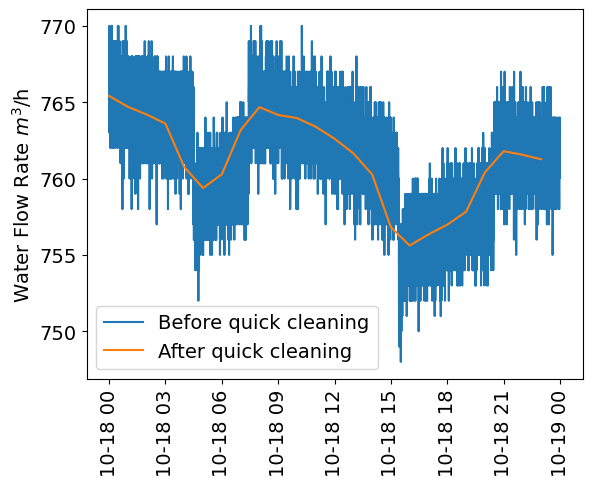

In [205]:

plt.plot(initial_view["Value"], label="Before quick cleaning")
plt.plot(df.loc["2022-10-18", 481], label="After quick cleaning")
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

In [206]:
df = df.rename(columns=df_refac_all.IDS_MAP)

In [207]:
df.loc["2020-10-22"]

T1aHE        P2      T1bHE      T2bHE      T2aHE  \
Timestamp                                                                   
2020-10-22 00:00:00  40.425789  0.400000  46.109524  26.364921  32.251562   
2020-10-22 01:00:00  40.942392  0.400055  46.525000  27.037838  32.886388   
2020-10-22 02:00:00  41.197297  0.400000  46.748128  27.438542  33.218717   
2020-10-22 03:00:00  41.780107  0.400000  47.395790  27.908021  33.742021   
2020-10-22 04:00:00  42.314516  0.400000  48.016043  28.258919  34.193478   
2020-10-22 05:00:00  42.646994  0.400000  48.354098  28.572487  34.516402   
2020-10-22 06:00:00  42.900000  0.400000  48.646196  28.711399  34.711578   
2020-10-22 07:00:00  43.126086  0.400000  48.895653  28.849489  34.875532   
2020-10-22 08:00:00  43.352689  0.400000  49.164286  29.010582  35.092391   
2020-10-22 09:00:00  43.442858  0.400000  49.304839  28.939062  35.094764   
2020-10-22 10:00:00  43.254011  0.400000  49.145213  28.671429  34.845604   
2020-10-22 11:00:00  43.222798  0.400000  49.159677  28.565054  34.768108   
2020-10-22 12:00:00  43.169231  0.400000  49.134615  28.488710  34.699448   
2020-10-22 13:00:00  43.200001  0.400000  49.162162  28.495628  34.704325   
2020-10-22 14:00:00  43.351099  0.400000  49.330108  28.591535  34.845834   
2020-10-22 15:00:00  43.450550  0.400000  49.412639  28.795789  35.006952   
2020-10-22 16:00:00  43.786339  0.400000  49.777778  29.050794  35.290811   
2020-10-22 17:00:00  43.965385  0.400000  49.951100  29.280214  35.515816   
2020-10-22 18:00:00  44.135911  0.400000  50.080435  29.401630  35.630850   
2020-10-22 19:00:00  44.051042  0.400000  50.153093  28.900000  35.315384   
2020-10-22 20:00:00  42.018408  0.400000  48.285714  26.141546  32.792683   
2020-10-22 21:00:00  40.161538  0.400000  46.451020  24.229442  30.849239   
2020-10-22 22:00:00  39.105236  0.400000  45.399474  23.193035  29.782051   
2020-10-22 23:00:00  38.441799  0.400000  44.748677  22.517703  29.096392   

                      Treactor     T2aHE1       Tair      CTF1       CTF2  \
Timestamp                                                                   
2020-10-22 00:00:00  43.593966  32.752105  11.230288  1.241996  74.668649   
2020-10-22 01:00:00  44.092704  33.363102  11.117062  0.990855  74.789077   
2020-10-22 02:00:00  44.278151  33.707065  10.731579  3.651988  75.010344   
2020-10-22 03:00:00  44.943913  34.215591   9.902956  0.934967  75.214573   
2020-10-22 04:00:00  45.618987  34.671276   9.673460  1.476966  75.161921   
2020-10-22 05:00:00  45.847258  34.994054   9.472350  0.113562  74.839855   
2020-10-22 06:00:00  46.132068  35.184324   9.721327  2.108446  74.781529   
2020-10-22 07:00:00  46.416667  35.360001   9.852913  0.578024  74.903881   
2020-10-22 08:00:00  46.611392  35.578803   8.739320  1.113137  74.652301   
2020-10-22 09:00:00  46.768936  35.574594   8.131163  1.891636  74.652502   
2020-10-22 10:00:00  46.644538  35.345355   7.649510  2.185670  75.224888   
2020-10-22 11:00:00  46.726160  35.271978   8.003883  1.136214  74.666703   
2020-10-22 12:00:00  46.782279  35.200001   9.080488  2.709655  73.923463   
2020-10-22 13:00:00  46.736596  35.207735  10.929596  1.074326  73.603577   
2020-10-22 14:00:00  46.956723  35.354144  11.172512  2.233898  73.457278   
2020-10-22 15:00:00  47.017796  35.510215  12.604762  3.450247  73.531676   
2020-10-22 16:00:00  47.498326  35.789730  14.046635  2.200928  74.230726   
2020-10-22 17:00:00  47.665546  36.013333  14.154634  1.007376  73.703412   
2020-10-22 18:00:00  47.850211  36.131720  13.616746  1.065914  73.354195   
2020-10-22 19:00:00  47.758051  35.857426  12.603828  1.351977  73.579902   
2020-10-22 20:00:00  46.086555  33.414925  10.552381  2.430338  73.786401   
2020-10-22 21:00:00  44.230126  31.508122   5.250000  1.336082  73.898291   
2020-10-22 22:00:00  43.220426  30.436316   4.645098  1.221834  73.895206   
2020-10-22 23:00:00  42.621368  29.750526   4.977895  1.057653  74.930114   

                   

In [208]:
df = df.reindex(sorted(df.columns), axis=1)

In [209]:
periods_all = df_refac_all.select_time_period(df, time_periods_all)
periods_all

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-12 13:00:00   2.211792   2.858656  3.951927  0.000000    1.000000   
 2020-10-12 14:00:00   2.247087   3.282794  2.232856  0.000000    1.000000   
 2020-10-12 15:00:00   1.456818   1.387404  1.980408  0.000000    1.000000   
 2020-10-12 16:00:00   2.858182   2.050269  1.616398  0.000000    1.000000   
 2020-10-12 17:00:00   1.733693   3.882871  1.963099  0.000000    1.000000   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 19:00:00   3.279919  75.210309  2.137597  0.400000  651.516667   
 2020-10-16 20:00:00   1.230549  75.387378  2.721192  0.400000  650.950000   
 2020-10-16 21:00:00   2.218159  75.826283  1.859537  0.400000  648.862500   
 2020-10-16 22:00:00  94.916879  75.970936  2.063978  0.400000  647.512500   
 2020-10-16 23:00:00  93.310654  73.908

In [210]:
pdp = PeriodicDataPreprocess(periods_all.copy())

In [211]:
pdp.conditional_rows_drop(["p21", "p22", "p23", "p24"], "eq", 0.0)

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-12 13:00:00   2.211792   2.858656  3.951927  0.000000    1.000000   
 2020-10-12 14:00:00   2.247087   3.282794  2.232856  0.000000    1.000000   
 2020-10-12 15:00:00   1.456818   1.387404  1.980408  0.000000    1.000000   
 2020-10-12 16:00:00   2.858182   2.050269  1.616398  0.000000    1.000000   
 2020-10-12 17:00:00   1.733693   3.882871  1.963099  0.000000    1.000000   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 19:00:00   3.279919  75.210309  2.137597  0.400000  651.516667   
 2020-10-16 20:00:00   1.230549  75.387378  2.721192  0.400000  650.950000   
 2020-10-16 21:00:00   2.218159  75.826283  1.859537  0.400000  648.862500   
 2020-10-16 22:00:00  94.916879  75.970936  2.063978  0.400000  647.512500   
 2020-10-16 23:00:00  93.310654  73.908

In [212]:
pdp.filter_by_zscore(column="Q2")
pdp.filter_by_zscore(column="dt1")
pdp.filter_by_zscore(column="dt2")


{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-13 00:00:00  87.874596  79.542941  2.887067  0.400374  647.658333   
 2020-10-13 13:00:00   2.324474  75.451867  2.597723  0.400000  650.441667   
 2020-10-13 14:00:00   0.974033  75.022443  2.525673  0.400000  652.804167   
 2020-10-13 15:00:00   1.565569  74.791295  1.400579  0.400000  654.187500   
 2020-10-13 16:00:00   1.986916  75.179120  2.714075  0.400000  654.016667   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 17:00:00   2.470476  75.291513  3.103629  0.400000  652.204167   
 2020-10-16 18:00:00   1.202009  75.236929  2.637113  0.400000  651.620833   
 2020-10-16 19:00:00   3.279919  75.210309  2.137597  0.400000  651.516667   
 2020-10-16 20:00:00   1.230549  75.387378  2.721192  0.400000  650.950000   
 2020-10-16 21:00:00   2.218159  75.826

In [213]:
pdp.sma_smoothing(num_points=10)

{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-13 00:00:00  10.391642  75.536672  2.366792  0.400037  651.812917   
 2020-10-13 13:00:00   1.769823  75.148147  2.332297  0.400000  652.146667   
 2020-10-13 14:00:00   1.645218  75.190566  2.289487  0.400000  652.247083   
 2020-10-13 15:00:00   1.720101  75.288327  2.248732  0.400000  652.162500   
 2020-10-13 16:00:00   1.709977  75.429964  2.264559  0.400000  651.994167   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 07:00:00   1.860920  76.042786  2.406443  0.400000  652.380000   
 2020-10-16 08:00:00   1.837302  75.922184  2.570533  0.400000  652.550417   
 2020-10-16 09:00:00   1.743052  75.794139  2.585332  0.400000  652.648750   
 2020-10-16 10:00:00   1.917581  75.670994  2.445336  0.400000  652.649167   
 2020-10-16 11:00:00   1.800827  75.551

In [214]:
pdp.pumps_mapping(columns=["p21", "p22", "p23", "p24"], drop_pumps=False)

['p21', 'p22', 'p23', 'p24']


{'2020-10-12 2020-10-16':                           CTF1       CTF2      CTF3        P2          Q2  \
 Timestamp                                                                   
 2020-10-13 00:00:00  10.391642  75.536672  2.366792  0.400037  651.812917   
 2020-10-13 13:00:00   1.769823  75.148147  2.332297  0.400000  652.146667   
 2020-10-13 14:00:00   1.645218  75.190566  2.289487  0.400000  652.247083   
 2020-10-13 15:00:00   1.720101  75.288327  2.248732  0.400000  652.162500   
 2020-10-13 16:00:00   1.709977  75.429964  2.264559  0.400000  651.994167   
 ...                        ...        ...       ...       ...         ...   
 2020-10-16 07:00:00   1.860920  76.042786  2.406443  0.400000  652.380000   
 2020-10-16 08:00:00   1.837302  75.922184  2.570533  0.400000  652.550417   
 2020-10-16 09:00:00   1.743052  75.794139  2.585332  0.400000  652.648750   
 2020-10-16 10:00:00   1.917581  75.670994  2.445336  0.400000  652.649167   
 2020-10-16 11:00:00   1.800827  75.551

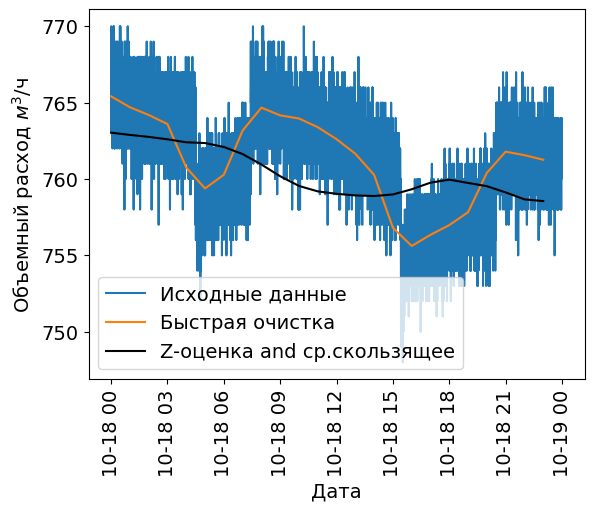

In [215]:
# quick view on sma results
plt.plot(initial_view["Value"], label="Исходные данные")
plt.plot(periods_all["2022-10-17 2022-10-21"].loc["2022-10-18", "Q2"], label="Быстрая очистка")
plt.plot(pdp.period["2022-10-17 2022-10-21"].loc["2022-10-18", "Q2"], label="Z-оценка and ср.скользящее", color="black")
# plt.ylabel("Water Flow Rate $m^3$/h")
plt.ylabel("Объемный расход $м^3$/ч")
plt.xlabel("Дата")
plt.xticks(rotation=90)
plt.legend()
# plt.ylim(640, 740)

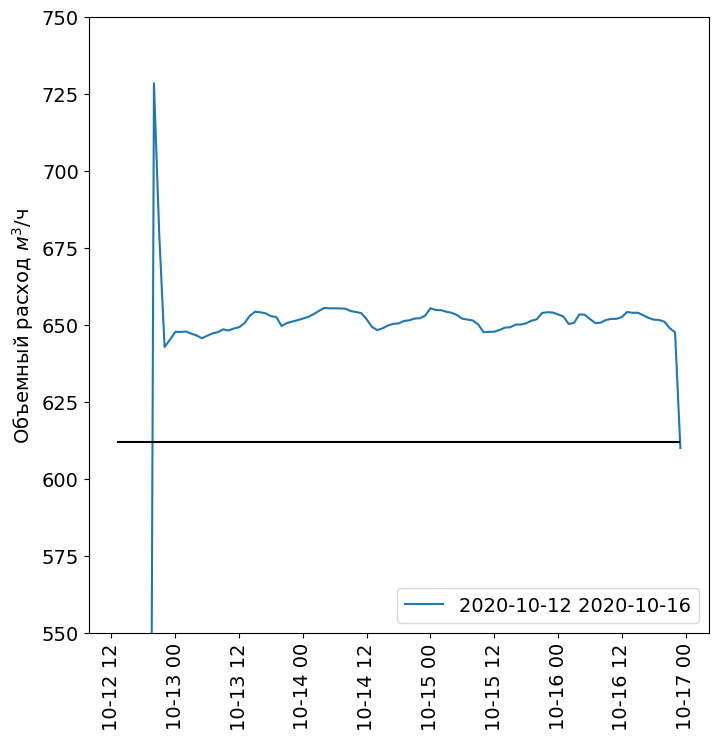

In [216]:
# plot Q2 for some weeks before zscore filtering

plt.figure(figsize=(8,8))
weeks = list(pdp.period_keys)[:1]
for i in weeks:
    plt.plot(periods_all[i]["Q2"], label=i)
    plt.hlines(
        periods_all[i]["Q2"].mean(),
        periods_all[i]["Q2"].index[0],
        periods_all[i]["Q2"].index[-1],
        color="black",
        
)

# plt.ylabel("Water Flow Rate $m^3$/h")
plt.ylabel("Объемный расход $м^3$/ч")
plt.ylim(550, 750)
plt.xticks(rotation=90)
plt.legend(loc='lower right')

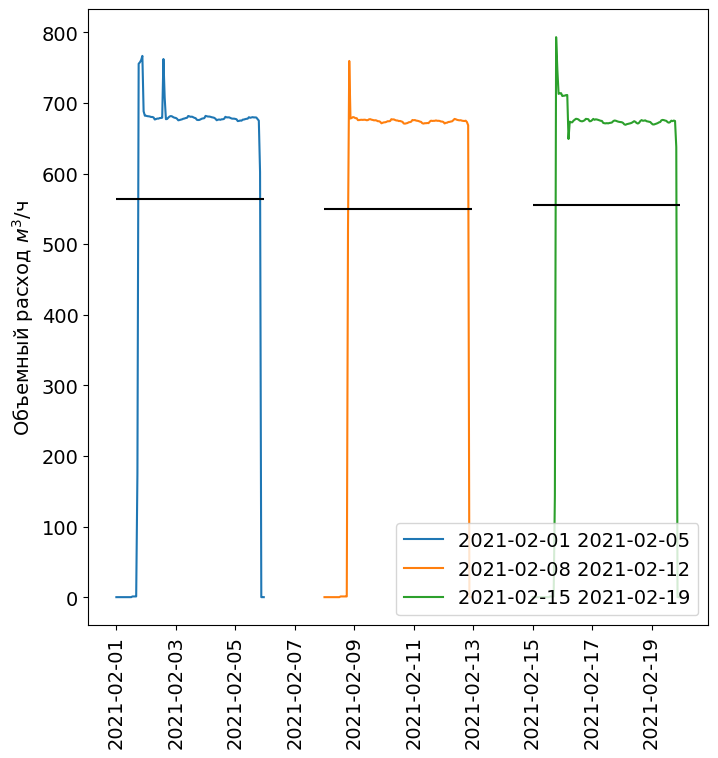

In [217]:
# plot Q2 for some weeks before zscore filtering
plt.figure(figsize=(8,8))
weeks = list(pdp.period_keys)[13:16]
for i in weeks:
    plt.plot(periods_all[i]["Q2"], label=i)
    plt.hlines(
        periods_all[i]["Q2"].mean(),
        periods_all[i]["Q2"].index[0],
        periods_all[i]["Q2"].index[-1],
        color="black",
#         label="среднее"
        
)
# plt.ylim(400, 950)
# plt.ylabel("Water Flow Rate $m^3$/h")
plt.ylabel("Объемный расход $м^3$/ч")
plt.xticks(rotation=90)
plt.legend(loc='lower right')

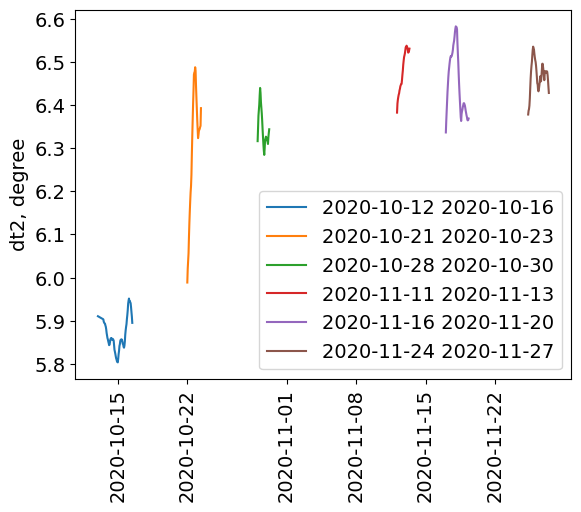

In [218]:
## dt2 has high bias so lets check how Q2 filtering fixed it
# plot dt for some weeks
# is there an urge to filter data one more time but now by dt?
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(
        pdp.period[i]["dt2"], 
        label=i)

plt.ylabel("dt2, degree")
plt.xticks(rotation=90)
plt.legend()

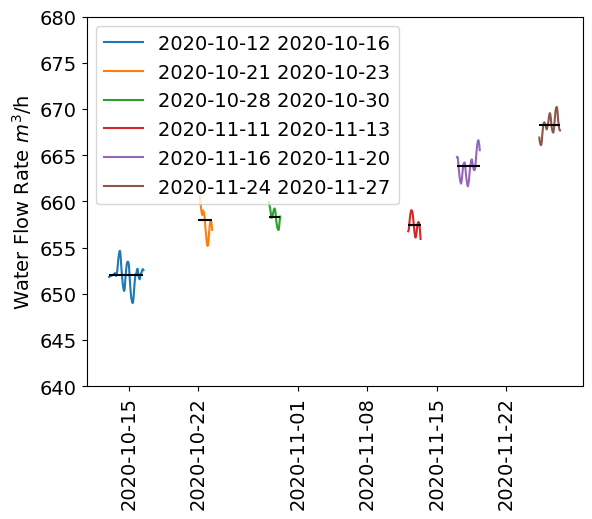

In [219]:
# plot Q2 for some weeks
weeks = list(pdp.period_keys)[:6]
for i in weeks:
    plt.plot(pdp.period[i]["Q2"], label=i)
    plt.hlines(
        pdp.period[i]["Q2"].mean(),
        pdp.period[i]["Q2"].index[0],
        pdp.period[i]["Q2"].index[-1],
        color="black"
        
)
plt.ylim(640,680)
plt.ylabel("Water Flow Rate $m^3$/h")
plt.xticks(rotation=90)
plt.legend()

Text(0.5, 0, 'Объемный расход, $м^3$/ч')

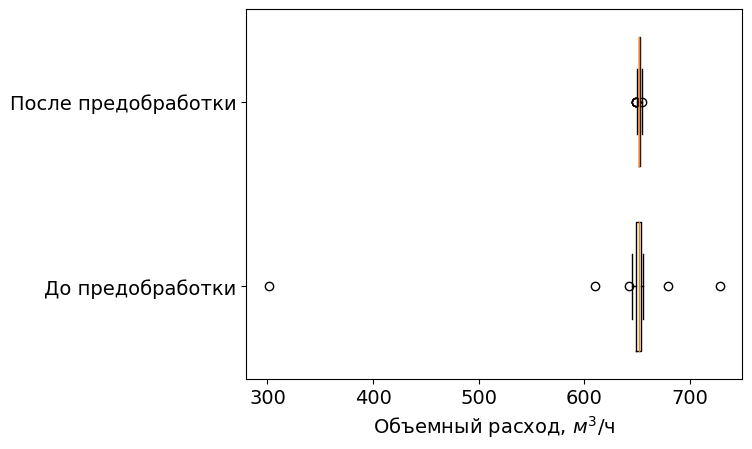

In [220]:
plt.rcParams.update({'font.size': 14})

# before filtering
plt.boxplot(
    labels=["До предобработки", "После предобработки"],
    x = [
        periods_all["2020-10-12 2020-10-16"]["Q2"][periods_all["2020-10-12 2020-10-16"]["Q2"] > 200],
        pdp.period["2020-10-12 2020-10-16"]["Q2"][pdp.period["2020-10-12 2020-10-16"]["Q2"] > 200]
    ],
    vert=False,
    widths=0.7
    
)
plt.xlabel("Объемный расход, $м^3$/ч")
# plt.boxplot(
#     pdp.period["2020-10-12 2020-10-16"]["Q2"][pdp.period["2020-10-12 2020-10-16"]["Q2"] > 200],
#     vert=False,
#     labels=["Water FLow Rate After"]
# )

In [221]:
df = pdp.to_dataframe()
df

CTF1       CTF2      CTF3        P2          Q2  \
Timestamp                                                                   
2020-10-13 00:00:00  10.391642  75.536672  2.366792  0.400037  651.812917   
2020-10-13 13:00:00   1.769823  75.148147  2.332297  0.400000  652.146667   
2020-10-13 14:00:00   1.645218  75.190566  2.289487  0.400000  652.247083   
2020-10-13 15:00:00   1.720101  75.288327  2.248732  0.400000  652.162500   
2020-10-13 16:00:00   1.709977  75.429964  2.264559  0.400000  651.994167   
...                        ...        ...       ...       ...         ...   
2023-06-09 04:00:00   0.000000   0.000000  0.000000  0.464802  807.172500   
2023-06-09 05:00:00   0.000000   0.000000  0.000000  0.464921  806.517917   
2023-06-09 06:00:00   0.000000   0.000000  0.000000  0.465088  805.804583   
2023-06-09 07:00:00   0.000000   0.000000  0.000000  0.465514  805.223333   
2023-06-09 08:00:00   0.000000   0.000000  0.000000  0.465814  804.670000   

                         T1aHE      T1bHE      T2aHE     T2aHE1     T2aHE2  \
Timestamp                                                                    
2020-10-13 00:00:00  41.489093  47.106167  33.441085  33.984650  33.655208   
2020-10-13 13:00:00  41.521119  47.103154  33.504863  34.047193  33.710372   
2020-10-13 14:00:00  41.665119  47.228287  33.671215  34.209205  33.871750   
2020-10-13 15:00:00  41.688156  47.239838  33.707642  34.244415  33.906022   
2020-10-13 16:00:00  41.639971  47.186255  33.663756  34.202676  33.862954   
...                        ...        ...        ...        ...        ...   
2023-06-09 04:00:00  46.443691  53.066350  33.227721  33.072649  33.352203   
2023-06-09 05:00:00  46.473907  53.095094  33.243556  33.086277  33.368003   
2023-06-09 06:00:00  46.490538  53.105898  33.247251  33.086449  33.369649   
2023-06-09 07:00:00  46.463895  53.079562  33.194609  33.030437  33.316925   
2023-06-09 08:00:00  46.395407  53.017473  33.084313  32.917730  33.207552   

                     ...      T2bHE       Tair   Treactor       p21  \
Timestamp            ...                                              
2020-10-13 00:00:00  ...  27.530647   6.704512  46.675417  2.027749   
2020-10-13 13:00:00  ...  27.601600   6.631041  46.800432  2.078860   
2020-10-13 14:00:00  ...  27.773236   6.405955  46.922489  2.047673   
2020-10-13 15:00:00  ...  27.812119   6.144858  46.944957  1.946019   
2020-10-13 16:00:00  ...  27.769766   5.829155  46.902795  1.984860   
...                  ...        ...        ...        ...       ...   
2023-06-09 04:00:00  ...  27.393276  25.476034  48.342410  1.034639   
2023-06-09 05:00:00  ...  27.408260  25.056418  48.364667  1.038312   
2023-06-09 06:00:00  ...  27.408487  24.625769  48.387894  1.011224   
2023-06-09 07:00:00  ...  27.349617  23.908962  48.363288  1.141287   
2023-06-09 08:00:00  ...  27.227741  22.923981  48.305505  1.164772   

                            p22         p23         p24       dt1       dt2  \
Timestamp                                                                     
2020-10-13 00:00:00  145.565675   87.493817   94.888844  5.617074  5.910438   
2020-10-13 13:00:00  145.521144   87.509749   94.877725  5.582035  5.903263   
2020-10-13 14:00:00  145.601967   87.545326   94.866934  5.563168  5.897979   
2020-10-13 15:00:00  145.730676   87.543530   94.789916  5.551682  5.895524   
2020-10-13 16:00:00  145.865957   87.565692   94.723563  5.546284  5.893990   
...                         ...         ...         ...       ...       ...   
2023-06-09 04:00:00  140.521763  140.826733  142.431751  6.622659  5.834446   
2023-06-09 05:00:00  140.140974  140.545179  142.146754  6.621187  5.835296   
2023-06-09 06:00:00  139.740269  140.249189  141.849076  6.615359  5.838764   
2023-06-09 07:00:00  139.377767  140.024869  141.610108  6.615667  5.844992   
2023-06-09 08:00:00  139.065254  139.874992  141.443849  6.622067  5.856572   

                     pumps2  
Timestamp                  

In [222]:
fe = FeatureEngineering(df.copy())

In [224]:
fe.df = fe.df.loc["2021-10":, :]

In [225]:
# makes new feature from passed columns
# if omitbelow is given excludes column from averaging
fe.columns_averaging(columns=["p21", "p22", "p23", "p24"], omitbelow=50, feature_name="I2mean")


['p21', 'p22', 'p23', 'p24']


CTF1      CTF2      CTF3        P2          Q2  \
Timestamp                                                                  
2021-10-04 22:00:00  90.017780  1.398453  1.785951  0.350112  966.680000   
2021-10-04 23:00:00  89.855427  1.216370  1.605490  0.350112  966.957500   
2021-10-05 00:00:00  89.811125  1.353286  1.628500  0.350112  967.161250   
2021-10-05 01:00:00  89.808862  1.567630  1.250434  0.350159  967.411667   
2021-10-05 02:00:00  89.826390  1.718457  1.071732  0.350175  967.678750   
...                        ...       ...       ...       ...         ...   
2023-06-09 04:00:00   0.000000  0.000000  0.000000  0.464802  807.172500   
2023-06-09 05:00:00   0.000000  0.000000  0.000000  0.464921  806.517917   
2023-06-09 06:00:00   0.000000  0.000000  0.000000  0.465088  805.804583   
2023-06-09 07:00:00   0.000000  0.000000  0.000000  0.465514  805.223333   
2023-06-09 08:00:00   0.000000  0.000000  0.000000  0.465814  804.670000   

                         T1aHE      T1bHE      T2aHE     T2aHE1     T2aHE2  \
Timestamp                                                                    
2021-10-04 22:00:00  45.244606  51.421308  38.728677  39.503385  39.629100   
2021-10-04 23:00:00  45.271435  51.462828  38.727637  39.505566  39.629997   
2021-10-05 00:00:00  45.251765  51.457265  38.684841  39.463057  39.588016   
2021-10-05 01:00:00  45.200123  51.414278  38.610272  39.391621  39.515617   
2021-10-05 02:00:00  45.129876  51.356851  38.521095  39.304197  39.428108   
...                        ...        ...        ...        ...        ...   
2023-06-09 04:00:00  46.443691  53.066350  33.227721  33.072649  33.352203   
2023-06-09 05:00:00  46.473907  53.095094  33.243556  33.086277  33.368003   
2023-06-09 06:00:00  46.490538  53.105898  33.247251  33.086449  33.369649   
2023-06-09 07:00:00  46.463895  53.079562  33.194609  33.030437  33.316925   
2023-06-09 08:00:00  46.395407  53.017473  33.084313  32.917730  33.207552   

                     ...       p21         p22         p23         p24  \
Timestamp            ...                                                 
2021-10-04 22:00:00  ...  0.665857  144.479151  143.932689  143.673157   
2021-10-04 23:00:00  ...  0.741501  144.767485  144.156673  143.910084   
2021-10-05 00:00:00  ...  0.740755  145.021273  144.303745  144.074970   
2021-10-05 01:00:00  ...  0.748089  145.218953  144.425312  144.215589   
2021-10-05 02:00:00  ...  0.747157  145.403222  144.530628  144.333299   
...                  ...       ...         ...         ...         ...   
2023-06-09 04:00:00  ...  1.034639  140.521763  140.826733  142.431751   
2023-06-09 05:00:00  ...  1.038312  140.140974  140.545179  142.146754   
2023-06-09 06:00:00  ...  1.011224  139.740269  140.249189  141.849076   
2023-06-09 07:00:00  ...  1.141287  139.377767  140.024869  141.610108   
2023-06-09 08:00:00  ...  1.164772  139.065254  139.874992  141.443849   

                          dt1       dt2  pumps2  dt_circuits_coef  \
Timestamp                                                           
2021-10-04 22:00:00  6.176701  5.468939     234          1.546053   
2021-10-04 23:00:00  6.191393  5.484800     234          1.548088   
2021-10-05 00:00:00  6.205499  5.498935     234          1.550576   
2021-10-05 01:00:00  6.214156  5.507801     234          1.553186   
2021-10-05 02:00:00  6.226974  5.514845     234          1.555973   
...                       ...       ...     ...               ...   
2023-06-09 04:00:00  6.622659  5.834446     234          1.937204   
2023-06-09 05:00:00  6.621187  5.835296     234          1.937193   
2023-06-09 06:00:00  6.615359  5.838764     234          1.937571   
2023-06-09 07:00:00  6.615667  5.844992     234          1.940779   
2023-06-09 08:00:00  6.622067  5.856572     234          1.947186   

                     dt_circuits_coef_delta      I2mean  
Timestamp                                                
2021-10-04 22:00:00               18.161570  

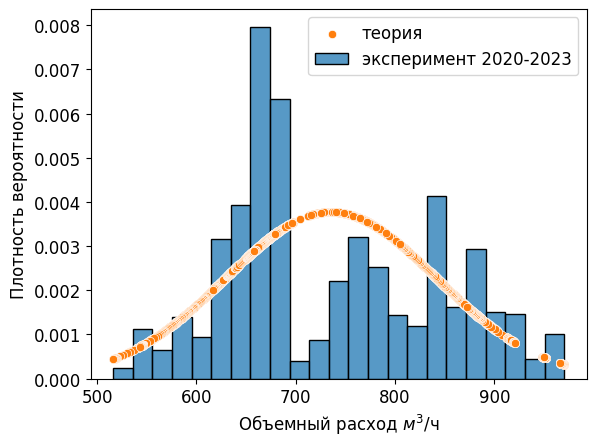

In [226]:
plt.rcParams.update({'font.size': 12})
sns.histplot(df.loc[:, "Q2"], stat="density", label="эксперимент 2020-2023")
mu, sigma = norm.fit(df.loc[:, "Q2"])
nrm = norm(mu, sigma).pdf(df.loc[:, "Q2"])
sns.scatterplot(x=df.loc[:, "Q2"], y=nrm, label="теория")

plt.ylabel("Плотность вероятности")
plt.xlabel("Объемный расход $м^3$/ч")
plt.legend()

ShapiroResult(statistic=0.9278750419616699, pvalue=2.493923512147944e-09)

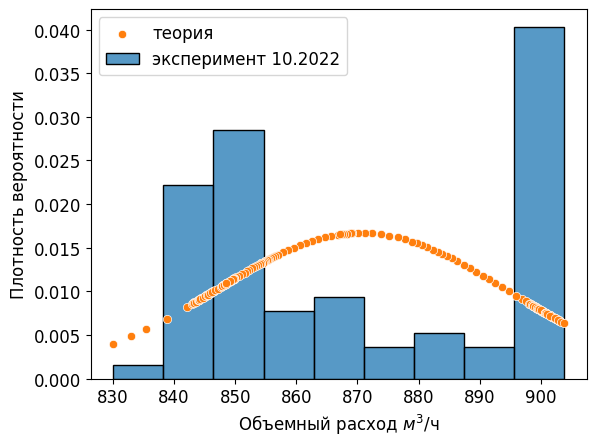

In [227]:
sns.histplot(df.loc["2021-11", "Q2"], stat="density", label="эксперимент 10.2022")
mu, sigma = norm.fit(fe.df.loc["2021-11", "Q2"])
nrm = norm(mu, sigma).pdf(fe.df.loc["2021-11", "Q2"])
sns.scatterplot(x=fe.df.loc["2021-11", "Q2"], y=nrm, label="теория")


plt.ylabel("Плотность вероятности")
plt.xlabel("Объемный расход $м^3$/ч")

scipy.stats.shapiro(nrm)

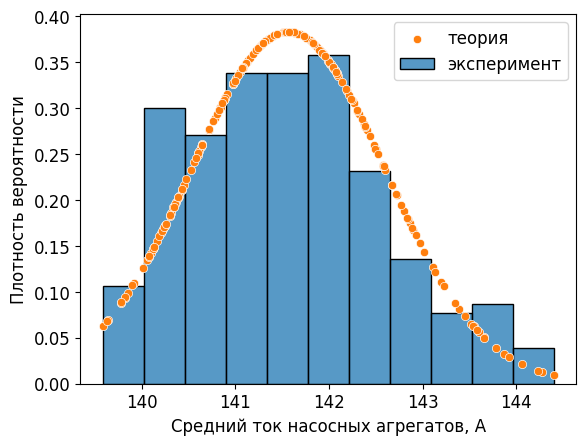

In [228]:
sns.histplot(fe.df.loc["2021-11", "I2mean"], stat="density", label="эксперимент")
mu, sigma = norm.fit(fe.df.loc["2021-11", "I2mean"])
nrm = norm(mu, sigma).pdf(fe.df.loc["2021-11", "I2mean"])
sns.scatterplot(x=fe.df.loc["2021-11", "I2mean"], y=nrm, label="теория")
plt.ylabel("Плотность вероятности")
plt.xlabel("Средний ток насосных агрегатов, А")
plt.legend()

In [229]:
fe.columns_categorizing(
    columns=["CTF1", "CTF2", "CTF3"],
    value=50,
    i=1,
    e=0,
    operator="gt"
)

CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
Timestamp                                                                
2021-10-04 22:00:00     1     0     0  0.350112  966.680000  45.244606   
2021-10-04 23:00:00     1     0     0  0.350112  966.957500  45.271435   
2021-10-05 00:00:00     1     0     0  0.350112  967.161250  45.251765   
2021-10-05 01:00:00     1     0     0  0.350159  967.411667  45.200123   
2021-10-05 02:00:00     1     0     0  0.350175  967.678750  45.129876   
...                   ...   ...   ...       ...         ...        ...   
2023-06-09 04:00:00     0     0     0  0.464802  807.172500  46.443691   
2023-06-09 05:00:00     0     0     0  0.464921  806.517917  46.473907   
2023-06-09 06:00:00     0     0     0  0.465088  805.804583  46.490538   
2023-06-09 07:00:00     0     0     0  0.465514  805.223333  46.463895   
2023-06-09 08:00:00     0     0     0  0.465814  804.670000  46.395407   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2021-10-04 22:00:00  51.421308  38.728677  39.503385  39.629100  ...   
2021-10-04 23:00:00  51.462828  38.727637  39.505566  39.629997  ...   
2021-10-05 00:00:00  51.457265  38.684841  39.463057  39.588016  ...   
2021-10-05 01:00:00  51.414278  38.610272  39.391621  39.515617  ...   
2021-10-05 02:00:00  51.356851  38.521095  39.304197  39.428108  ...   
...                        ...        ...        ...        ...  ...   
2023-06-09 04:00:00  53.066350  33.227721  33.072649  33.352203  ...   
2023-06-09 05:00:00  53.095094  33.243556  33.086277  33.368003  ...   
2023-06-09 06:00:00  53.105898  33.247251  33.086449  33.369649  ...   
2023-06-09 07:00:00  53.079562  33.194609  33.030437  33.316925  ...   
2023-06-09 08:00:00  53.017473  33.084313  32.917730  33.207552  ...   

                          p21         p22         p23         p24       dt1  \
Timestamp                                                                     
2021-10-04 22:00:00  0.665857  144.479151  143.932689  143.673157  6.176701   
2021-10-04 23:00:00  0.741501  144.767485  144.156673  143.910084  6.191393   
2021-10-05 00:00:00  0.740755  145.021273  144.303745  144.074970  6.205499   
2021-10-05 01:00:00  0.748089  145.218953  144.425312  144.215589  6.214156   
2021-10-05 02:00:00  0.747157  145.403222  144.530628  144.333299  6.226974   
...                       ...         ...         ...         ...       ...   
2023-06-09 04:00:00  1.034639  140.521763  140.826733  142.431751  6.622659   
2023-06-09 05:00:00  1.038312  140.140974  140.545179  142.146754  6.621187   
2023-06-09 06:00:00  1.011224  139.740269  140.249189  141.849076  6.615359   
2023-06-09 07:00:00  1.141287  139.377767  140.024869  141.610108  6.615667   
2023-06-09 08:00:00  1.164772  139.065254  139.874992  141.443849  6.622067   

                          dt2  pumps2  dt_circuits_coef  \
Timestamp                                                 
2021-10-04 22:00:00  5.468939     234          1.546053   
2021-10-04 23:00:00  5.484800     234          1.548088   
2021-10-05 00:00:00  5.498935     234          1.550576   
2021-10-05 01:00:00  5.507801     234          1.553186   
2021-10-05 02:00:00  5.514845     234          1.555973   
...                       ...     ...               ...   
2023-06-09 04:00:00  5.834446     234          1.937204   
2023-06-09 05:00:00  5.835296     234          1.937193   
2023-06-09 06:00:00  5.838764     234          1.937571   
2023-06-09 07:00:00  5.844992     234          1.940779   
2023-06-09 08:00:00  5.856572     234          1.947186   

                     dt_circuits_coef_delta      I2mean  
Timestamp                                                
2021-10-04 22:00:00               18.161570  144.028332  
2021-10-04 23:00:00               18.219991  144.278081  
2021-10-05 00:00:00               18.271358  144.466663  
2021-10-05 01:00:00               1

In [230]:
fe.make_QbyIP()

CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
Timestamp                                                                
2021-10-04 22:00:00     1     0     0  0.350112  966.680000  45.244606   
2021-10-04 23:00:00     1     0     0  0.350112  966.957500  45.271435   
2021-10-05 00:00:00     1     0     0  0.350112  967.161250  45.251765   
2021-10-05 01:00:00     1     0     0  0.350159  967.411667  45.200123   
2021-10-05 02:00:00     1     0     0  0.350175  967.678750  45.129876   
...                   ...   ...   ...       ...         ...        ...   
2023-06-09 04:00:00     0     0     0  0.464802  807.172500  46.443691   
2023-06-09 05:00:00     0     0     0  0.464921  806.517917  46.473907   
2023-06-09 06:00:00     0     0     0  0.465088  805.804583  46.490538   
2023-06-09 07:00:00     0     0     0  0.465514  805.223333  46.463895   
2023-06-09 08:00:00     0     0     0  0.465814  804.670000  46.395407   

                         T1bHE      T2aHE     T2aHE1     T2aHE2  ...  \
Timestamp                                                        ...   
2021-10-04 22:00:00  51.421308  38.728677  39.503385  39.629100  ...   
2021-10-04 23:00:00  51.462828  38.727637  39.505566  39.629997  ...   
2021-10-05 00:00:00  51.457265  38.684841  39.463057  39.588016  ...   
2021-10-05 01:00:00  51.414278  38.610272  39.391621  39.515617  ...   
2021-10-05 02:00:00  51.356851  38.521095  39.304197  39.428108  ...   
...                        ...        ...        ...        ...  ...   
2023-06-09 04:00:00  53.066350  33.227721  33.072649  33.352203  ...   
2023-06-09 05:00:00  53.095094  33.243556  33.086277  33.368003  ...   
2023-06-09 06:00:00  53.105898  33.247251  33.086449  33.369649  ...   
2023-06-09 07:00:00  53.079562  33.194609  33.030437  33.316925  ...   
2023-06-09 08:00:00  53.017473  33.084313  32.917730  33.207552  ...   

                            p22         p23         p24       dt1       dt2  \
Timestamp                                                                     
2021-10-04 22:00:00  144.479151  143.932689  143.673157  6.176701  5.468939   
2021-10-04 23:00:00  144.767485  144.156673  143.910084  6.191393  5.484800   
2021-10-05 00:00:00  145.021273  144.303745  144.074970  6.205499  5.498935   
2021-10-05 01:00:00  145.218953  144.425312  144.215589  6.214156  5.507801   
2021-10-05 02:00:00  145.403222  144.530628  144.333299  6.226974  5.514845   
...                         ...         ...         ...       ...       ...   
2023-06-09 04:00:00  140.521763  140.826733  142.431751  6.622659  5.834446   
2023-06-09 05:00:00  140.140974  140.545179  142.146754  6.621187  5.835296   
2023-06-09 06:00:00  139.740269  140.249189  141.849076  6.615359  5.838764   
2023-06-09 07:00:00  139.377767  140.024869  141.610108  6.615667  5.844992   
2023-06-09 08:00:00  139.065254  139.874992  141.443849  6.622067  5.856572   

                     pumps2  dt_circuits_coef  dt_circuits_coef_delta  \
Timestamp                                                               
2021-10-04 22:00:00     234          1.546053               18.161570   
2021-10-04 23:00:00     234          1.548088               18.219991   
2021-10-05 00:00:00     234          1.550576               18.271358   
2021-10-05 01:00:00     234          1.553186               18.311807   
2021-10-05 02:00:00     234          1.555973               18.350601   
...                     ...               ...                     ...   
2023-06-09 04:00:00     234          1.937204               25.673074   
2023-06-09 05:00:00     234          1.937193               25.686834   
2023-06-09 06:00:00     234          1.937571               25.697411   
2023-06-09 07:00:00     234          1.940779               25.729945   
2023-06-09 08:00:00     234          1.947186               25.789732   

                         I2mean      QbyIP  
Timestamp                                   
2021-10-04 22:00:00  144.028332  19.170272  
2021-10-

In [231]:
fe.make_dts_on_HEs()

CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
Timestamp                                                                
2021-10-04 22:00:00     1     0     0  0.350112  966.680000  45.244606   
2021-10-04 23:00:00     1     0     0  0.350112  966.957500  45.271435   
2021-10-05 00:00:00     1     0     0  0.350112  967.161250  45.251765   
2021-10-05 01:00:00     1     0     0  0.350159  967.411667  45.200123   
2021-10-05 02:00:00     1     0     0  0.350175  967.678750  45.129876   
...                   ...   ...   ...       ...         ...        ...   
2023-06-09 04:00:00     0     0     0  0.464802  807.172500  46.443691   
2023-06-09 05:00:00     0     0     0  0.464921  806.517917  46.473907   
2023-06-09 06:00:00     0     0     0  0.465088  805.804583  46.490538   
2023-06-09 07:00:00     0     0     0  0.465514  805.223333  46.463895   
2023-06-09 08:00:00     0     0     0  0.465814  804.670000  46.395407   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  \
Timestamp                                                      ...   
2021-10-04 22:00:00  51.421308  38.728677  0.343783  0.350706  ...   
2021-10-04 23:00:00  51.462828  38.727637  0.343728  0.350558  ...   
2021-10-05 00:00:00  51.457265  38.684841  0.343551  0.350390  ...   
2021-10-05 01:00:00  51.414278  38.610272  0.343448  0.350219  ...   
2021-10-05 02:00:00  51.356851  38.521095  0.343201  0.349954  ...   
...                        ...        ...       ...       ...  ...   
2023-06-09 04:00:00  53.066350  33.227721  0.221219  0.232108  ...   
2023-06-09 05:00:00  53.095094  33.243556  0.221048  0.232015  ...   
2023-06-09 06:00:00  53.105898  33.247251  0.220955  0.231975  ...   
2023-06-09 07:00:00  53.079562  33.194609  0.220786  0.231921  ...   
2023-06-09 08:00:00  53.017473  33.084313  0.220630  0.231868  ...   

                            p22         p23         p24       dt1       dt2  \
Timestamp                                                                     
2021-10-04 22:00:00  144.479151  143.932689  143.673157  6.176701  5.468939   
2021-10-04 23:00:00  144.767485  144.156673  143.910084  6.191393  5.484800   
2021-10-05 00:00:00  145.021273  144.303745  144.074970  6.205499  5.498935   
2021-10-05 01:00:00  145.218953  144.425312  144.215589  6.214156  5.507801   
2021-10-05 02:00:00  145.403222  144.530628  144.333299  6.226974  5.514845   
...                         ...         ...         ...       ...       ...   
2023-06-09 04:00:00  140.521763  140.826733  142.431751  6.622659  5.834446   
2023-06-09 05:00:00  140.140974  140.545179  142.146754  6.621187  5.835296   
2023-06-09 06:00:00  139.740269  140.249189  141.849076  6.615359  5.838764   
2023-06-09 07:00:00  139.377767  140.024869  141.610108  6.615667  5.844992   
2023-06-09 08:00:00  139.065254  139.874992  141.443849  6.622067  5.856572   

                     pumps2  dt_circuits_coef  dt_circuits_coef_delta  \
Timestamp                                                               
2021-10-04 22:00:00     234          1.546053               18.161570   
2021-10-04 23:00:00     234          1.548088               18.219991   
2021-10-05 00:00:00     234          1.550576               18.271358   
2021-10-05 01:00:00     234          1.553186               18.311807   
2021-10-05 02:00:00     234          1.555973               18.350601   
...                     ...               ...                     ...   
2023-06-09 04:00:00     234          1.937204               25.673074   
2023-06-09 05:00:00     234          1.937193               25.686834   
2023-06-09 06:00:00     234          1.937571               25.697411   
2023-06-09 07:00:00     234          1.940779               25.729945   
2023-06-09 08:00:00     234          1.947186               25.789732   

                         I2mean      QbyIP  
Timestamp                                   
2021-10-04 22:00:00  144.028332  19.170272  
2021-10-04 23:00:00  144.278081  1

# The data above are in range of 14.10.2020-08.09.2023
## Annually few or all HE's were under fouling remove services to increase cooling system efficiency
## Reactor onpower dates are
### [ (2019-08-22, 2020-06-29), (2020-10-12, 2021-07-02), (2021-09-06, 2022-07-01), (2022-09-05, 2023-06-09) ]

In [232]:
fe.df.loc["2022-06-30"]

CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
Timestamp                                                                
2022-06-30 00:00:00     1     1     1  0.430017  778.802500  43.826761   
2022-06-30 01:00:00     1     1     1  0.430017  778.002083  43.640272   
2022-06-30 02:00:00     1     1     1  0.430017  777.317083  43.394847   
2022-06-30 03:00:00     1     1     1  0.430017  776.880417  43.129260   
2022-06-30 04:00:00     1     1     1  0.430017  776.875833  42.882237   
2022-06-30 05:00:00     1     1     1  0.430017  776.975833  42.673913   
2022-06-30 06:00:00     1     1     1  0.430000  776.879583  42.515142   
2022-06-30 07:00:00     1     1     1  0.430000  776.397500  42.379708   
2022-06-30 08:00:00     1     1     1  0.430000  775.926250  42.242289   
2022-06-30 09:00:00     1     1     1  0.430000  775.380833  42.237582   
2022-06-30 10:00:00     1     1     1  0.430000  774.897500  42.360346   
2022-06-30 11:00:00     1     1     1  0.430000  774.931250  42.532456   
2022-06-30 12:00:00     1     1     1  0.430000  774.957500  42.739736   
2022-06-30 13:00:00     0     1     1  0.430000  774.987083  42.948088   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  \
Timestamp                                                      ...   
2022-06-30 00:00:00  50.235356  31.012525  0.240158  0.252600  ...   
2022-06-30 01:00:00  50.059467  30.778499  0.240242  0.252689  ...   
2022-06-30 02:00:00  49.824433  30.476661  0.240343  0.252746  ...   
2022-06-30 03:00:00  49.565907  30.161745  0.240426  0.252721  ...   
2022-06-30 04:00:00  49.319511  29.878253  0.240447  0.252649  ...   
2022-06-30 05:00:00  49.113273  29.644250  0.240434  0.252535  ...   
2022-06-30 06:00:00  48.955027  29.471776  0.240415  0.252474  ...   
2022-06-30 07:00:00  48.822075  29.313741  0.240488  0.252480  ...   
2022-06-30 08:00:00  48.685975  29.160983  0.240587  0.252452  ...   
2022-06-30 09:00:00  48.664161  29.203308  0.240613  0.252352  ...   
2022-06-30 10:00:00  48.776312  29.363422  0.240685  0.252381  ...   
2022-06-30 11:00:00  48.936815  29.574830  0.240689  0.252345  ...   
2022-06-30 12:00:00  49.131760  29.823675  0.240675  0.252304  ...   
2022-06-30 13:00:00  49.331980  30.072688  0.240642  0.252302  ...   

                            p22         p23         p24       dt1       dt2  \
Timestamp                                                                     
2022-06-30 00:00:00  137.902539  141.371104  134.852992  6.408595  5.674841   
2022-06-30 01:00:00  137.620412  141.196826  134.659356  6.419195  5.690664   
2022-06-30 02:00:00  137.329293  141.029519  134.477498  6.429586  5.706411   
2022-06-30 03:00:00  137.003837  140.818551  134.251415  6.436647  5.718298   
2022-06-30 04:00:00  136.661788  140.551935  133.960796  6.437274  5.722581   
2022-06-30 05:00:00  136.245319  140.266680  133.638466  6.439360  5.723266   
2022-06-30 06:00:00  135.816033  140.001939  133.339198  6.439885  5.722865   
2022-06-30 07:00:00  135.471741  139.835766  133.147526  6.442367  5.727017   
2022-06-30 08:00:00  135.364460  139.790366  133.106679  6.443686  5.728183   
2022-06-30 09:00:00  135.666611  139.977046  133.328959  6.426579  5.706121   
2022-06-30 10:00:00  136.021995  140.203645  133.606414  6.415965  5.692723   
2022-06-30 11:00:00  136.242783  140.295467  133.737181  6.404359  5.679445   
2022-06-30 12:00:00  136.445855  140.345215  133.823319  6.392024  5.665659   
2022-06-30 13:00:00  136.740045  140.467933  133.980753  6.383892  5.653488   

                     pumps2  dt_circuits_coef  dt_circuits_coef_delta  \
Timestamp                                                               
2022-06-30 00:00:00     234          1.982634               24.897672   
2022-06-30 01:00:00     234          1.995368               24.971632   
2022-06-30 02:00:00     234          2.011463               25.054183   
2022-06-30 03:00:00     234          2.027779               25.122459   
2022-06-30 0

In [158]:
# 2023-2024 season included 

# he1 = [
#     ("2019-08-22", "2021-07-02"), # 2915
#     ("2021-09-06", "2022-06-30"), # 0
#     ("2022-09-05", "2023-06-09"), # 0
#     ("2023-09-05", "2023-09-08")  # 0
# ]
# he2 = [
#     ("2019-08-22", "2021-07-02"), # 2915
#     ("2021-09-06", "2022-06-30"), # 0
#     ("2022-09-05", "2023-06-09"), # 0
#     ("2023-09-05", "2023-09-08")  # 0
# ]

# # I assume that in 2021 the valve of 1st circuit of HE3 was broken
# # but at 2nd cicuit the valve was not closed so HE3 was under operation till 2023

# # he3 = [
# #     ("2020-10-12", "2021-06-01"), 
# #     ("2022-03-14", "2023-04-21"), 
# #     ("2023-05-30 19:00", "2023-06-09"),
# #     ("2023-09-05", "2023-09-08")
# # ]

# he3 = [
#     ("2020-10-12", "2021-06-01"), # 0
#     ("2021-06-21", "2021-07-02"), # 0
#     ("2021-09-06", "2022-06-30"), # ""
#     ("2022-09-05", "2023-04-21"), # ""
#     ("2023-05-30 19:00", "2023-06-09"), # ""
#     ("2023-09-05", "2023-09-08") # 0
# ]

# he4 = [
#     ("2019-10-14", "2021-06-01"), # 0 
#     ("2021-06-21", "2021-07-02"), # 0
#     ("2021-09-06", "2022-03-14"), # 0
#     ("2022-09-05", "2023-05-31"), # 0
#     ("2023-06-01 19:00", "2023-06-09") # ""
# ]
# he5 = [
#     ("2020-06-08", "2021-07-02"), # 0
#     ("2021-09-06", "2022-06-30"), # 0
#     ("2023-05-02", "2023-06-09"), # 0
#     ("2023-09-05", "2023-09-08")  # ""
# ]

# # there is a bug when start argument is higher than 1000
# fe.make_time_onpower_feature(
#     time_periods=he1, 
#     feature_name="HE1_TOP",
#     start=[2915, 0, 0, 0]
# )
# # fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"]+ 2915

# fe.make_time_onpower_feature(
#     time_periods=he2, 
#     feature_name="HE2_TOP",
#     start=[2915, 0, 0, 0]
# )
# # fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"]+ 2915

# fe.make_time_onpower_feature(
#     time_periods=he3, 
#     feature_name="HE3_TOP",
#     start=[0, 0, "", "", "", 0]
# )


# fe.make_time_onpower_feature(
#     time_periods=he4, 
#     feature_name="HE4_TOP",
#     start=[0, 0, 0, 0, ""]

# )

# fe.make_time_onpower_feature(
#     time_periods=he5, 
#     feature_name="HE5_TOP",
#     start=[0, 0, 0, ""]
# )


In [233]:
# starts with october 2021
# 2023-2024 season not included 


he1 = [
    ("2021-10-04", "2022-06-30"), # 0
    ("2022-09-05", "2023-06-09"), # 0
]
he2 = [
    ("2021-10-04", "2022-06-30"), # 0
    ("2022-09-05", "2023-06-09") # 0
]

# I assume that in 2021 the valve of 1st circuit of HE3 was broken
# but at 2nd cicuit the valve was not closed so HE3 was under operation till 2023

he3 = [
    ("2022-03-14", "2023-04-21"), # 0
    ("2023-05-30 19:00", "2023-06-09"), # ""
]

he4 = [
    ("2021-10-04", "2022-03-14"), # 0
    ("2022-09-05", "2023-05-31"), # 0
    ("2023-06-01 19:00", "2023-06-09") # ""
]
he5 = [
    ("2021-10-04", "2022-06-30"), # 0
    ("2023-05-02", "2023-06-09"), # 0
]

# there is a bug when start argument is higher than 1000
fe.make_time_onpower_feature(
    time_periods=he1, 
    feature_name="HE1_TOP",
    start=[0, 0]
)
# fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"]+ 2915

fe.make_time_onpower_feature(
    time_periods=he2, 
    feature_name="HE2_TOP",
    start=[0, 0]
)
# fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"]+ 2915

fe.make_time_onpower_feature(
    time_periods=he3, 
    feature_name="HE3_TOP",
    start=[0, ""]
)


fe.make_time_onpower_feature(
    time_periods=he4, 
    feature_name="HE4_TOP",
    start=[0, 0, ""]

)

fe.make_time_onpower_feature(
    time_periods=he5, 
    feature_name="HE5_TOP",
    start=[0, 0]
)


[3.61073826e+00 7.22147651e+00 1.08322148e+01 ... 6.44877852e+03
 6.45238926e+03 6.45600000e+03] 1788 1788
[3.72228443e+00 7.44456887e+00 1.11668533e+01 ... 6.64055543e+03
 6.64427772e+03 6.64800000e+03] 1786 1786
[3.61073826e+00 7.22147651e+00 1.08322148e+01 ... 6.44877852e+03
 6.45238926e+03 6.45600000e+03] 1788 1788
[3.72228443e+00 7.44456887e+00 1.11668533e+01 ... 6.64055543e+03
 6.64427772e+03 6.64800000e+03] 1786 1786
[4.47363552e+00 8.94727105e+00 1.34209066e+01 ... 9.66305273e+03
 9.66752636e+03 9.67200000e+03] 2162 2162
[9673.56737589 9675.13475177 9676.70212766 9678.26950355 9679.83687943
 9681.40425532 9682.97163121 9684.53900709 9686.10638298 9687.67375887
 9689.24113475 9690.80851064 9692.37588652 9693.94326241 9695.5106383
 9697.07801418 9698.64539007 9700.21276596 9701.78014184 9703.34751773
 9704.91489362 9706.4822695  9708.04964539 9709.61702128 9711.18439716
 9712.75177305 9714.31914894 9715.88652482 9717.45390071 9719.0212766
 9720.58865248 9722.15602837 9723.7234042

CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
Timestamp                                                                
2021-10-04 22:00:00     1     0     0  0.350112  966.680000  45.244606   
2021-10-04 23:00:00     1     0     0  0.350112  966.957500  45.271435   
2021-10-05 00:00:00     1     0     0  0.350112  967.161250  45.251765   
2021-10-05 01:00:00     1     0     0  0.350159  967.411667  45.200123   
2021-10-05 02:00:00     1     0     0  0.350175  967.678750  45.129876   
...                   ...   ...   ...       ...         ...        ...   
2023-06-09 04:00:00     0     0     0  0.464802  807.172500  46.443691   
2023-06-09 05:00:00     0     0     0  0.464921  806.517917  46.473907   
2023-06-09 06:00:00     0     0     0  0.465088  805.804583  46.490538   
2023-06-09 07:00:00     0     0     0  0.465514  805.223333  46.463895   
2023-06-09 08:00:00     0     0     0  0.465814  804.670000  46.395407   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  pumps2  \
Timestamp                                                      ...           
2021-10-04 22:00:00  51.421308  38.728677  0.343783  0.350706  ...     234   
2021-10-04 23:00:00  51.462828  38.727637  0.343728  0.350558  ...     234   
2021-10-05 00:00:00  51.457265  38.684841  0.343551  0.350390  ...     234   
2021-10-05 01:00:00  51.414278  38.610272  0.343448  0.350219  ...     234   
2021-10-05 02:00:00  51.356851  38.521095  0.343201  0.349954  ...     234   
...                        ...        ...       ...       ...  ...     ...   
2023-06-09 04:00:00  53.066350  33.227721  0.221219  0.232108  ...     234   
2023-06-09 05:00:00  53.095094  33.243556  0.221048  0.232015  ...     234   
2023-06-09 06:00:00  53.105898  33.247251  0.220955  0.231975  ...     234   
2023-06-09 07:00:00  53.079562  33.194609  0.220786  0.231921  ...     234   
2023-06-09 08:00:00  53.017473  33.084313  0.220630  0.231868  ...     234   

                     dt_circuits_coef  dt_circuits_coef_delta      I2mean  \
Timestamp                                                                   
2021-10-04 22:00:00          1.546053               18.161570  144.028332   
2021-10-04 23:00:00          1.548088               18.219991  144.278081   
2021-10-05 00:00:00          1.550576               18.271358  144.466663   
2021-10-05 01:00:00          1.553186               18.311807  144.619951   
2021-10-05 02:00:00          1.555973               18.350601  144.755716   
...                               ...                     ...         ...   
2023-06-09 04:00:00          1.937204               25.673074  141.260082   
2023-06-09 05:00:00          1.937193               25.686834  140.944302   
2023-06-09 06:00:00          1.937571               25.697411  140.612844   
2023-06-09 07:00:00          1.940779               25.729945  140.337581   
2023-06-09 08:00:00          1.947186               25.789732  140.128032   

                         QbyIP      HE1_TOP      HE2_TOP      HE3_TOP  \
Timestamp                                                               
2021-10-04 22:00:00  19.170272     3.610738     3.610738     0.000000   
2021-10-04 23:00:00  19.142581     7.221477     7.221477     0.000000   
2021-10-05 00:00:00  19.121621    10.832215    10.832215     0.000000   
2021-10-05 01:00:00  19.103742    14.442953    14.442953     0.000000   
2021-10-05 02:00:00  19.090200    18.053691    18.053691     0.000000   
...                        ...          ...          ...          ...   
2023-06-09 04:00:00  12.293596  6633.110862  6633.110862  9886.730496   
2023-06-09 05:00:00  12.307991  6636.833147  6636.833147  9888.297872   
2023-06-09 06:00:00  12.321675  6640.555431  6640.555431  9889.865248   
2023-06-09 07:00:00  12.325648  6644.277716  6644.277716  9891.432624   
2023-06-09 08:00:00  12.327653  6648.000000  6648.000000  9893.000000   

                         HE4_TOP     HE5_TOP  
Timestamp                                   

In [234]:

# he1 = [
#     ("2019-08-22", "2021-07-02"), # 2915
#     ("2021-09-06", "2022-06-30"), # 0
#     ("2022-09-05", "2023-06-09"), # 0
# ]
# he2 = [
#     ("2019-08-22", "2021-07-02"), # 2915
#     ("2021-09-06", "2022-06-30"), # 0
#     ("2022-09-05", "2023-06-09") # 0
# ]

# # I assume that in 2021 the valve of 1st circuit of HE3 was broken
# # but at 2nd cicuit the valve was not closed so HE3 was under operation till 2023

# he3 = [
#     ("2020-10-12", "2021-06-01"), # 0 
#     ("2022-03-14", "2023-04-21"), # 0
#     ("2023-05-30 19:00", "2023-06-09"), # ""
# ]

# # he3 = [
# #     ("2020-10-12", "2021-06-01"), # 0
# #     ("2021-06-21", "2021-07-02"), # 0
# #     ("2021-09-06", "2022-06-30"), # ""
# #     ("2022-09-05", "2023-04-21"), # ""
# #     ("2023-05-30 19:00", "2023-06-09") # ""
# # ]

# he4 = [
#     ("2019-10-14", "2021-06-01"), # 0 
#     ("2021-06-21", "2021-07-02"), # 0
#     ("2021-09-06", "2022-03-14"), # 0
#     ("2022-09-05", "2023-05-31"), # 0
#     ("2023-06-01 19:00", "2023-06-09") # ""
# ]
# he5 = [
#     ("2020-06-08", "2021-07-02"), # 0
#     ("2021-09-06", "2022-06-30"), # 0
#     ("2023-05-02", "2023-06-09"), # 0
# ]

# # there is a bug when start argument is higher than 1000
# fe.make_time_onpower_feature(
#     time_periods=he1, 
#     feature_name="HE1_TOP",
#     start=[2915, 0, 0]
# )
# # fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE1_TOP"]+ 2915

# fe.make_time_onpower_feature(
#     time_periods=he2, 
#     feature_name="HE2_TOP",
#     start=[2915, 0, 0]
# )
# # fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"] = fe.df.loc["2019-08-22": "2021-07-02", "HE2_TOP"]+ 2915

# fe.make_time_onpower_feature(
#     time_periods=he3, 
#     feature_name="HE3_TOP",
#     start=[0, 0, ""]
# )


# fe.make_time_onpower_feature(
#     time_periods=he4, 
#     feature_name="HE4_TOP",
#     start=[0, 0, 0, 0, ""]

# )

# fe.make_time_onpower_feature(
#     time_periods=he5, 
#     feature_name="HE5_TOP",
#     start=[0, 0, 0]
# )


In [235]:
fe.df.loc["2023-06", :]

CTF1  CTF2  CTF3        P2          Q2      T1aHE  \
Timestamp                                                                
2023-06-01 00:00:00     0     0     0  0.480000  767.597500  40.659835   
2023-06-01 01:00:00     0     0     0  0.480000  767.525417  40.867285   
2023-06-01 02:00:00     0     0     0  0.479983  767.486667  41.162393   
2023-06-01 03:00:00     0     0     0  0.479967  767.197500  41.529802   
2023-06-01 04:00:00     0     0     0  0.479967  766.557083  41.919780   
...                   ...   ...   ...       ...         ...        ...   
2023-06-09 04:00:00     0     0     0  0.464802  807.172500  46.443691   
2023-06-09 05:00:00     0     0     0  0.464921  806.517917  46.473907   
2023-06-09 06:00:00     0     0     0  0.465088  805.804583  46.490538   
2023-06-09 07:00:00     0     0     0  0.465514  805.223333  46.463895   
2023-06-09 08:00:00     0     0     0  0.465814  804.670000  46.395407   

                         T1bHE      T2aHE    T2aHE1    T2aHE2  ...  pumps2  \
Timestamp                                                      ...           
2023-06-01 00:00:00  47.620525  26.803491  0.220197  0.222805  ...     234   
2023-06-01 01:00:00  47.818226  27.030491  0.220128  0.222680  ...     234   
2023-06-01 02:00:00  48.095045  27.377292  0.220058  0.222667  ...     234   
2023-06-01 03:00:00  48.444534  27.798319  0.220107  0.222686  ...     234   
2023-06-01 04:00:00  48.821713  28.229662  0.220202  0.222796  ...     234   
...                        ...        ...       ...       ...  ...     ...   
2023-06-09 04:00:00  53.066350  33.227721  0.221219  0.232108  ...     234   
2023-06-09 05:00:00  53.095094  33.243556  0.221048  0.232015  ...     234   
2023-06-09 06:00:00  53.105898  33.247251  0.220955  0.231975  ...     234   
2023-06-09 07:00:00  53.079562  33.194609  0.220786  0.231921  ...     234   
2023-06-09 08:00:00  53.017473  33.084313  0.220630  0.231868  ...     234   

                     dt_circuits_coef  dt_circuits_coef_delta      I2mean  \
Timestamp                                                                   
2023-06-01 00:00:00          2.308306               26.990451  142.918820   
2023-06-01 01:00:00          2.291334               26.949063  142.505946   
2023-06-01 02:00:00          2.264981               26.860847  142.082257   
2023-06-01 03:00:00          2.235291               26.771946  141.697175   
2023-06-01 04:00:00          2.207550               26.705927  141.252575   
...                               ...                     ...         ...   
2023-06-09 04:00:00          1.937204               25.673074  141.260082   
2023-06-09 05:00:00          1.937193               25.686834  140.944302   
2023-06-09 06:00:00          1.937571               25.697411  140.612844   
2023-06-09 07:00:00          1.940779               25.729945  140.337581   
2023-06-09 08:00:00          1.947186               25.789732  140.128032   

                         QbyIP      HE1_TOP      HE2_TOP      HE3_TOP  \
Timestamp                                                               
2023-06-01 00:00:00  11.189300  6234.826428  6234.826428  9719.021277   
2023-06-01 01:00:00  11.220664  6238.548712  6238.548712  9720.588652   
2023-06-01 02:00:00  11.253946  6242.270997  6242.270997  9722.156028   
2023-06-01 03:00:00  11.280671  6245.993281  6245.993281  9723.723404   
2023-06-01 04:00:00  11.306731  6249.715566  6249.715566  9725.290780   
...                        ...          ...          ...          ...   
2023-06-09 04:00:00  12.293596  6633.110862  6633.110862  9886.730496   
2023-06-09 05:00:00  12.307991  6636.833147  6636.833147  9888.297872   
2023-06-09 06:00:00  12.321675  6640.555431  6640.555431  9889.865248   
2023-06-09 07:00:00  12.325648  6644.277716  6644.277716  9891.432624   
2023-06-09 08:00:00  12.327653  6648.000000  6648.000000  9893.000000   

                         HE4_TOP     HE5_TOP  
Timestamp                                   

In [236]:
# Important step must be added to package/module

fe.df["HE1_status"] = np.zeros(len(fe.df))
fe.df["HE2_status"] = np.zeros(len(fe.df))
fe.df["HE3_status"] = np.zeros(len(fe.df))
fe.df["HE4_status"] = np.zeros(len(fe.df))
fe.df["HE5_status"] = np.zeros(len(fe.df))

fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0

fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE2"][fe.df.loc[:, "HE2_TOP"] == 0] = 0

fe.df.loc[:, "HE3_status"][fe.df.loc[:, "HE3_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE3"][fe.df.loc[:, "HE3_TOP"] == 0] = 0

fe.df.loc[:, "HE4_status"][fe.df.loc[:, "HE4_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE4"][fe.df.loc[:, "HE4_TOP"] == 0] = 0

fe.df.loc[:, "HE5_status"][fe.df.loc[:, "HE5_TOP"] != 0] = 1
fe.df.loc[:, "T2aHE5"][fe.df.loc[:, "HE5_TOP"] == 0] = 0


/tmp/ipykernel_7817/2441187994.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE1_status"][fe.df.loc[:, "HE1_TOP"] != 0] = 1
/tmp/ipykernel_7817/2441187994.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "T2aHE1"][fe.df.loc[:, "HE1_TOP"] == 0] = 0
/tmp/ipykernel_7817/2441187994.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fe.df.loc[:, "HE2_status"][fe.df.loc[:, "HE2_TOP"] != 0] = 1
/tmp/ipyk

In [237]:
fe.df["HE_TOP_mean"] = fe.df.loc[:, 
                                 ["HE1_TOP", "HE2_TOP", "HE3_TOP", "HE4_TOP", "HE5_TOP"]
                                ].mean(axis=1)

In [238]:
fe.df["CTF_sum"] = fe.df.loc[:, 
                                 ["CTF1", "CTF2", "CTF3"]
                                ].sum(axis=1)

In [239]:
# final cleaning incase some rows consist of nan
fe.df = fe.df.dropna(axis=0)

In [240]:
fe.df.loc["2021-10", ["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]]

HE1_status  HE2_status  HE3_status  HE4_status  \
Timestamp                                                             
2021-10-04 22:00:00         1.0         1.0         0.0         1.0   
2021-10-04 23:00:00         1.0         1.0         0.0         1.0   
2021-10-05 00:00:00         1.0         1.0         0.0         1.0   
2021-10-05 01:00:00         1.0         1.0         0.0         1.0   
2021-10-05 02:00:00         1.0         1.0         0.0         1.0   
...                         ...         ...         ...         ...   
2021-10-15 04:00:00         1.0         1.0         0.0         1.0   
2021-10-15 05:00:00         1.0         1.0         0.0         1.0   
2021-10-15 06:00:00         1.0         1.0         0.0         1.0   
2021-10-15 07:00:00         1.0         1.0         0.0         1.0   
2021-10-15 08:00:00         1.0         1.0         0.0         1.0   

                     HE5_status  
Timestamp                        
2021-10-04 22:00:00         1.0  
2021-10-04 23:00:00         1.0  
2021-10-05 00:00:00         1.0  
2021-10-05 01:00:00         1.0  
2021-10-05 02:00:00         1.0  
...                         ...  
2021-10-15 04:00:00         1.0  
2021-10-15 05:00:00         1.0  
2021-10-15 06:00:00         1.0  
2021-10-15 07:00:00         1.0  
2021-10-15 08:00:00         1.0  

[157 rows x 5 columns]

# Some visualizations before data export to make sure everything is ok

(array([18905., 18907., 18909., 18911., 18913., 18915.]),
 [Text(18905.0, 0, '2021-10-05'),
  Text(18907.0, 0, '2021-10-07'),
  Text(18909.0, 0, '2021-10-09'),
  Text(18911.0, 0, '2021-10-11'),
  Text(18913.0, 0, '2021-10-13'),
  Text(18915.0, 0, '2021-10-15')])

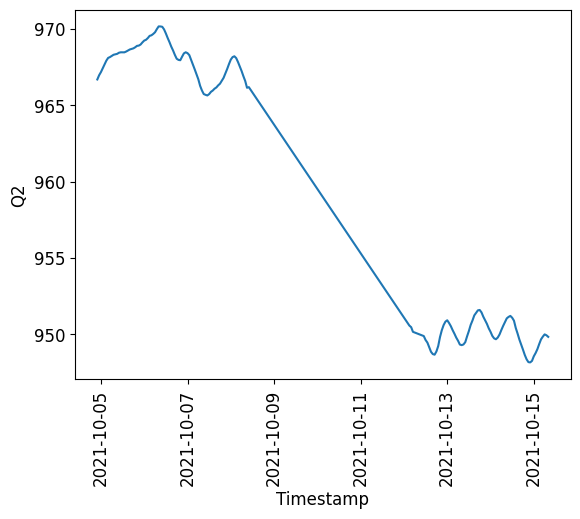

In [242]:
sns.lineplot(fe.df.loc["2021-10", "Q2"])
plt.xticks(rotation=90)

(array([18932., 18993., 19052., 19113., 19174., 19236., 19297., 19358.,
        19417., 19478., 19539.]),
 [Text(18932.0, 0, '2021-11'),
  Text(18993.0, 0, '2022-01'),
  Text(19052.0, 0, '2022-03'),
  Text(19113.0, 0, '2022-05'),
  Text(19174.0, 0, '2022-07'),
  Text(19236.0, 0, '2022-09'),
  Text(19297.0, 0, '2022-11'),
  Text(19358.0, 0, '2023-01'),
  Text(19417.0, 0, '2023-03'),
  Text(19478.0, 0, '2023-05'),
  Text(19539.0, 0, '2023-07')])

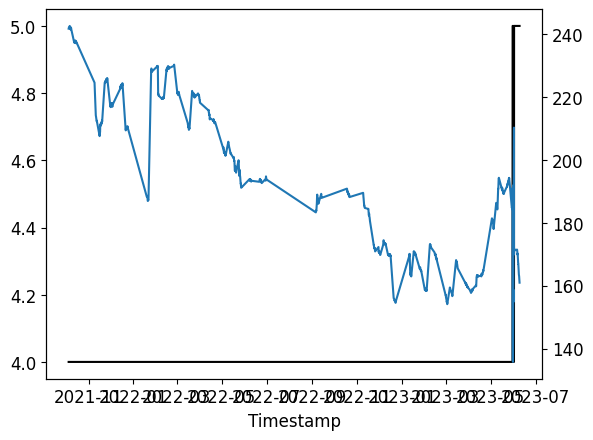

In [243]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
sns.lineplot(fe.df[["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1), color="black", ax=ax)
sns.lineplot(fe.df["Q2"] / fe.df[["HE1_status", "HE2_status", "HE3_status", "HE4_status", "HE5_status"]].sum(axis=1), ax=ax1)

plt.xticks(rotation=90)

<AxesSubplot: xlabel='Timestamp', ylabel='HE3_status'>

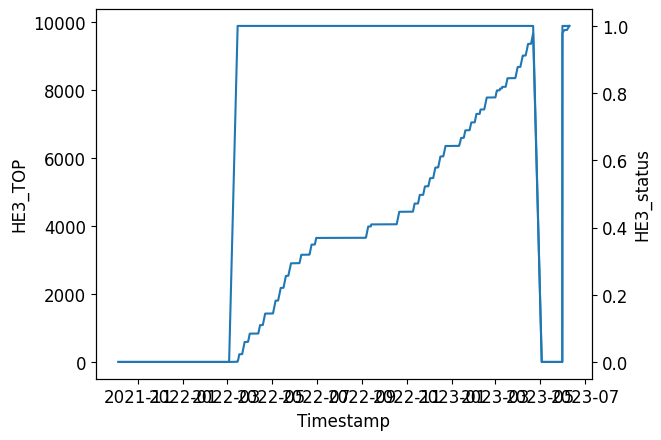

In [244]:
fig, ax = plt.subplots()
ax1 = ax.twinx()

sns.lineplot(fe.df["HE3_TOP"], ax=ax)
sns.lineplot(fe.df["HE3_status"], ax=ax1)

<AxesSubplot: >

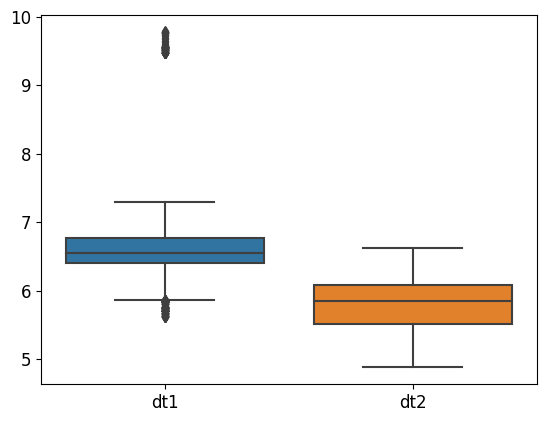

In [245]:
sns.boxplot(fe.df.loc[:, ["dt1", "dt2"]])

In [170]:
fe.df = fe.df[fe.df["P2"] >= 0.3] 

In [246]:
fe.df.to_excel("!important_input_files/rdy_for_stats_041021_090623_1h_freq.xlsx")